## Plots and analysis for new LF-DEM simulations

##### This data is less rigid than previous data (~ 1% max. particle overlap)

In [1]:
# importing libraries

import os
import glob
import matplotlib
import math
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
from scipy.optimize import curve_fit
import matplotlib.pyplot as     plt
from   matplotlib        import font_manager
from   fractions         import Fraction
import pickle
import warnings
from prettytable import PrettyTable
from IPython.display import display, HTML 
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

# Matplotlib rc parameters modification
plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

### Parameters

| Column 1                   | Column 2                         | Column 3                           | Column 4                           | Column 5                           |
|:----------------------------|:----------------------------------|:------------------------------------|:------------------------------------|:------------------------------------|
| <span style="font-size:16px">0. time</span>                    | <span style="font-size:16px">8. particle pressure</span>       | <span style="font-size:16px">16. frictional contact number</span> | <span style="font-size:16px">24. kt</span>                    | <span style="font-size:16px">32. std(Z)</span>                 |
| <span style="font-size:16px">1. cumulated shear strain</span>   | <span style="font-size:16px">9. particle pressure contact</span> | <span style="font-size:16px">17. average sliding friction</span> | <span style="font-size:16px">25. kr</span>                    | <span style="font-size:16px">33. mean(Znet)</span>              |
| <span style="font-size:16px">2. shear rate</span>               | <span style="font-size:16px">10. N1 viscosity</span>             | <span style="font-size:16px">18. number of interactions</span>  | <span style="font-size:16px">26. shear strain (x) = 0</span>         | <span style="font-size:16px">34. std(Znet)</span>              |
| <span style="font-size:16px">3. viscosity</span>                | <span style="font-size:16px">11. N2 viscosity</span>             | <span style="font-size:16px">19. max tangential displacement</span> | <span style="font-size:16px">27. shear strain (y) = 0</span>         |                                    |
| <span style="font-size:16px">4. Viscosity(contact)</span>       | <span style="font-size:16px">12. energy</span>                   | <span style="font-size:16px">20. max angular velocity</span>   | <span style="font-size:16px">28. shear strain (z)</span>         |                                    |
| <span style="font-size:16px">5. Viscosity(dashpot)</span>       | <span style="font-size:16px">13. min gap</span>                  | <span style="font-size:16px">21. dt</span>                    | <span style="font-size:16px">29. theta shear</span>          |                                    |
| <span style="font-size:16px">6. Viscosity(hydro)</span>         | <span style="font-size:16px">14. max tangential displacement</span> | <span style="font-size:16px">22. max velocity</span>          | <span style="font-size:16px">30. Rigid clusters</span>       |                                    |
| <span style="font-size:16px">7. Viscosity(repulsion)</span>     | <span style="font-size:16px">15. contact number</span>           | <span style="font-size:16px">23. kn</span>                    | <span style="font-size:16px">31. mean(Z)</span>              |                                    |


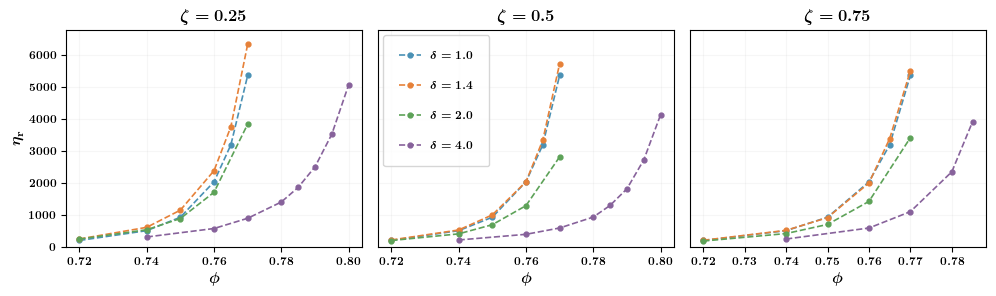

In [3]:
# Viscosity plot
# Reading the data_*.dat file

npp      = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.80] #[0.70, 0.72, 0.74, 0.77]
#phi_vals = [0.70, 0.78] 
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [1, 1.4, 2, 4]
numRuns  = 2
off      = 100
cmap     = matplotlib.colormaps['viridis_r'] 

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

fig,axs = plt.subplots(nrows=1, ncols=len(vr_vals), figsize=(10, 3))
    
for i, vr in enumerate(vr_vals):
    for j, ar in enumerate(ar_vals):
        vrj = '0.25' if ar == 1 else vr
        visc = []
        for k, phi in enumerate(phi_vals):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir+"data_*.dat")
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 
        
        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phi_vals) if not np.isnan(x)]
        axs[i].plot(phi_vals_filtered, visc_filtered, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
             color=colors[j],linewidth=1.2, markersize=3.5)
        axs[i].set_xlabel(r'$\mathbf{\phi}$', fontsize=11)
        axs[i].set_title(fr'$\zeta = {vr_vals[i]}$', fontsize=12)
        axs[i].grid('both', alpha = .1)
        axs[i].set_ylim(0, 6800)
        
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$\mathbf{\eta_{r}}$', fontsize=11)
axs[1].legend(loc = 'best', labelspacing=1.8, borderpad=1.4)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+"Viscosity2"+figFormat, bbox_inches="tight",dpi=500)
plt.show()

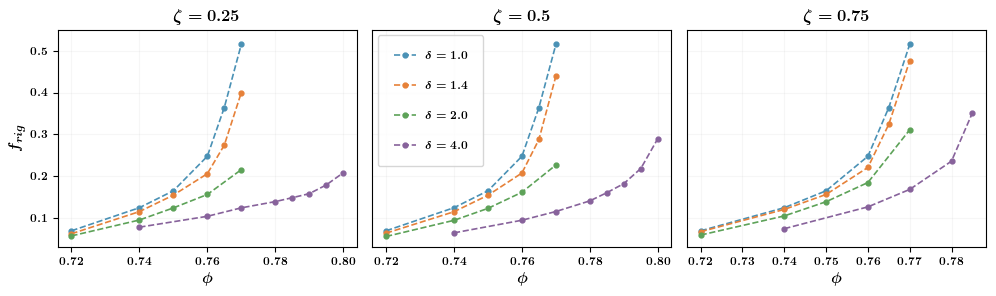

In [5]:
# F_rig plot
# Reading the data_*.dat file

npp      = 1000
phi_vals = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 2
off      = 100
cmap     = matplotlib.colormaps['viridis_r'] 

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

fig,axs = plt.subplots(nrows=1, ncols=len(vr_vals), figsize=(10, 3))

for i, vr in enumerate(vr_vals):
    for j, ar in enumerate(ar_vals):
        vrj = '0.25' if ar == 1 else vr
        frig =[]
        for k, phi in enumerate(phi_vals):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            frig_list = []
            for run in range(numRuns):
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = workDir+"F_rig.txt"
                    data     = np.loadtxt(dataFile)
                    frig_list.append(np.mean(data[off:])) if len(data[off:]) > off else None
            frig.append(np.mean(frig_list)/npp if frig_list else np.nan) 

        frig_filtered     = [x for x in frig if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(frig, phi_vals) if not np.isnan(x)]
        axs[i].plot(phi_vals_filtered, frig_filtered, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
             color=colors[j],linewidth=1.2, markersize=3.5)
        axs[i].set_xlabel(r'$\mathbf{\phi}$', fontsize=11)
        axs[i].set_title(fr'$\zeta = {vr_vals[i]}$', fontsize=12)
        axs[i].grid('both', alpha = .1)
        axs[i].set_ylim(0.03, 0.55)
        
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$f_{rig}$', fontsize=11)
axs[1].legend(loc = 'best', labelspacing=1.8, borderpad=1.4)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+"frig"+figFormat, bbox_inches="tight",dpi=500)
plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,0.785,2.110,0.998,,,0.785,2.110,0.998,,,0.785,2.110,0.998,,
1.4,,,0.786,2.504,0.998,,,0.785,2.076,0.999,,,0.785,2.134,0.996,,
2.0,,,0.789,2.273,0.999,,,0.790,1.844,0.999,,,0.787,1.678,0.999,,
4.0,,,0.823,3.906,0.999,,,0.819,2.309,0.999,,,0.802,1.740,1.000,,


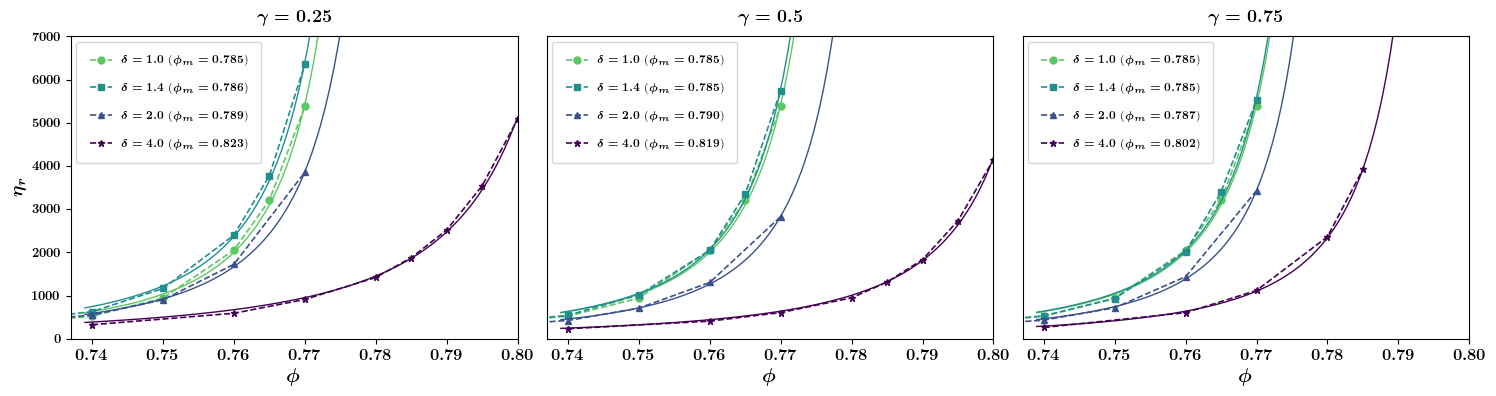

In [146]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)


def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return c * (base ** -2)

display(Math(r"\eta_r = c * \left( 1 - \frac{\phi}{\phi_m} \right)^{-2}"))

# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim    = []
cvals   = []
c_guess = 1
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,p0=[c_guess, k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim.append(phims)
    cvals.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

<IPython.core.display.Math object>

/Users/rahul/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,0.780,1.000,0.953,,,0.780,1.000,0.953,,,0.780,1.000,0.953,,
1.4,,,0.780,1.000,0.931,,,0.780,1.000,0.956,,,0.780,1.000,0.949,,
2.0,,,0.782,1.000,0.949,,,0.785,1.000,0.968,,,0.783,1.000,0.980,,
4.0,,,0.811,1.000,0.792,,,0.812,1.000,0.925,,,0.798,1.000,0.977,,


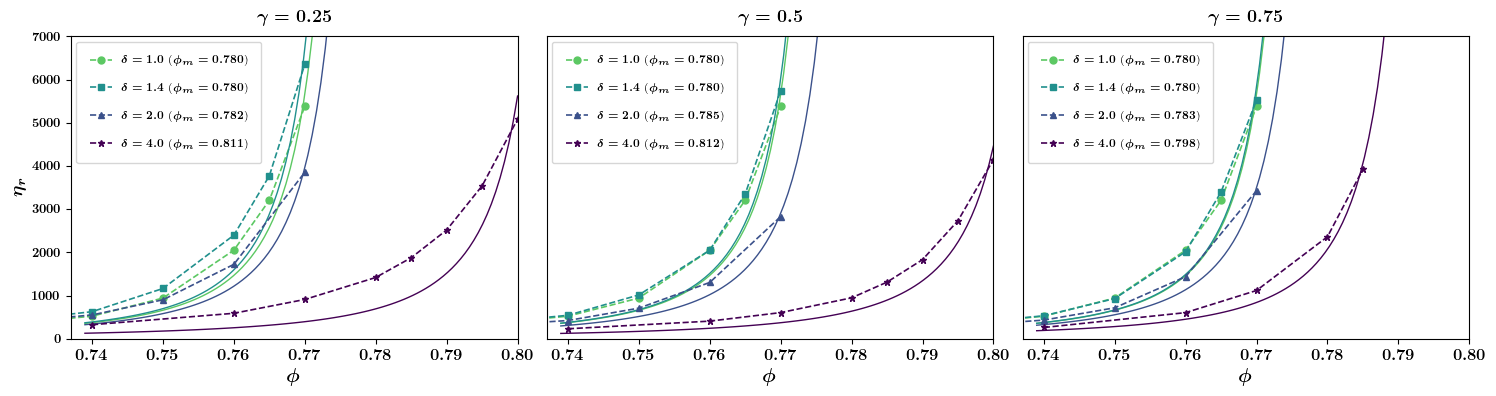

In [145]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)


def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -2)

display(Math(r"\eta_r = 1 * \left( 1 - \frac{\phi}{\phi_m} \right)^{-2}"))

# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim    = []
cvals   = []
c_guess = 1
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, _   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,p0=[c_guess, k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim.append(phims)
    cvals.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,0.789,2.911,0.999,,,0.789,2.911,0.999,,,0.789,2.911,0.999,,
1.4,,,0.789,2.996,0.999,,,0.788,2.900,0.999,,,0.789,2.917,0.997,,
2.0,,,0.794,2.970,1.000,,,0.794,2.859,1.000,,,0.790,2.806,1.000,,
4.0,,,0.832,3.160,1.000,,,0.824,2.859,0.999,,,0.804,2.763,1.000,,


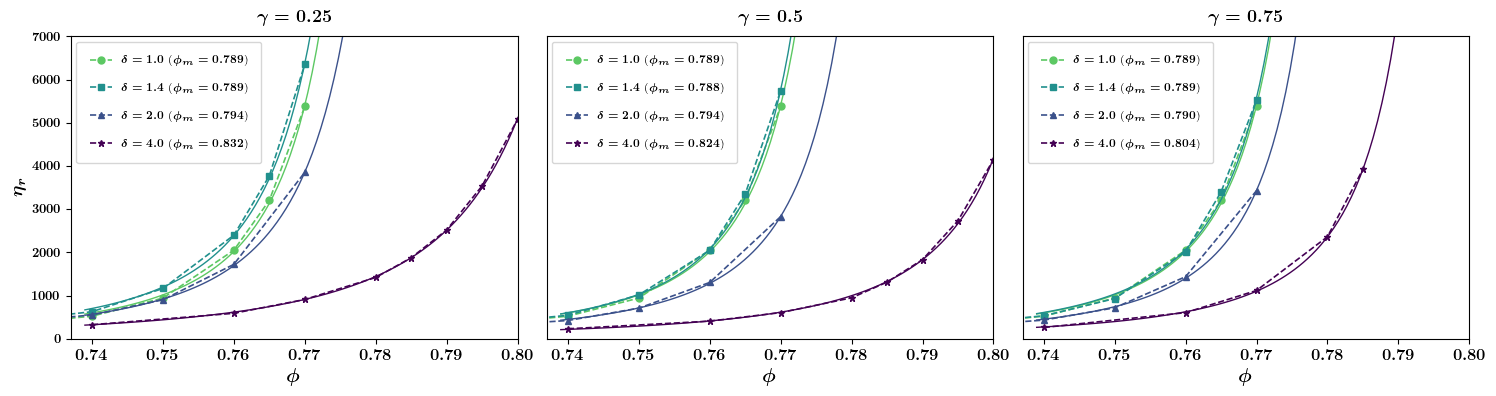

In [5]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -(k*c))

display(Math(r"\eta_r = 1 * \left( 1 - \frac{\phi}{\phi_m} \right)^{-c*\phi_m}"))

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim    = []
cvals   = []
c_guess = 3
k_guess = [[.785,.785,.792,0.85],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.815]]
           # initial guess for max phi (phim)

# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, _   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,p0=[c_guess, k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim.append(phims)
    cvals.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,0.789,2.296,0.999,,,0.789,2.296,0.999,,,0.789,2.296,0.999,,
1.4,,,0.789,2.365,0.999,,,0.788,2.284,0.999,,,0.789,2.300,0.997,,
2.0,,,0.794,2.358,1.000,,,0.794,2.270,1.000,,,0.790,2.217,1.000,,
4.0,,,0.832,2.630,1.000,,,0.824,2.355,0.999,,,0.804,2.223,1.000,,


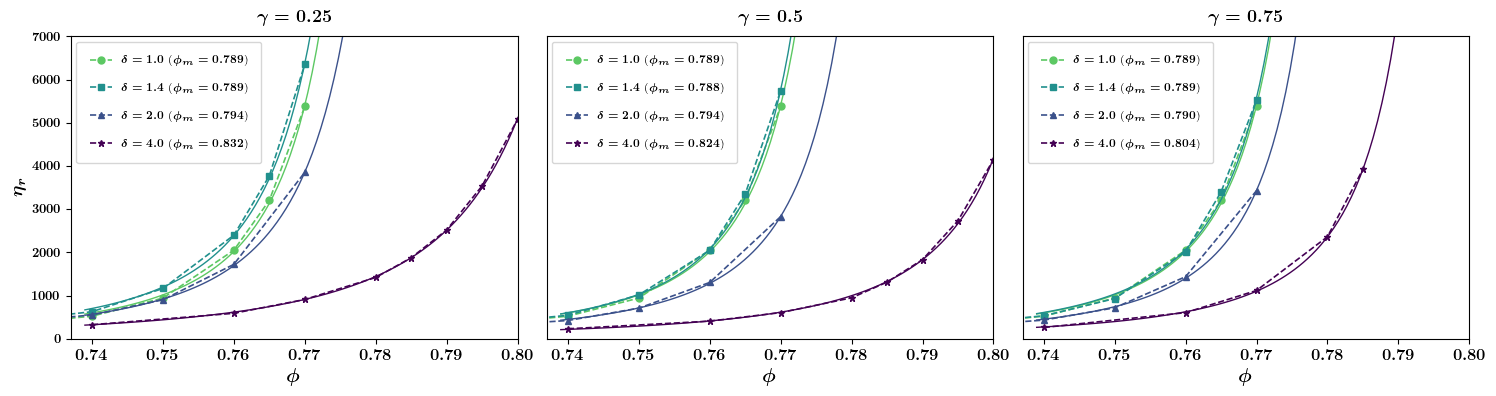

In [57]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Maron & Pierce (1956)
# def maronpierce(x,c, k):
#     return c*(1 - (x/(k))) ** -2

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

display(Math(r"\eta_r = \left( 1 - \frac{\phi}{\phi_m} \right)^{-c}"))

# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim    = []
cvals   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim.append(phims)
    cvals.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [46]:
print(pd.DataFrame(phim, index=vrr, columns=arr)), print(pd.DataFrame(cvals, index=vrr, columns=arr))

           1.0       1.4       2.0       4.0
0.25  0.785495  0.785544  0.789140  0.822686
0.5   0.785495  0.784877  0.790146  0.819237
0.75  0.785495  0.785336  0.787398  0.801860
           1.0       1.4       2.0       4.0
0.25  2.109634  2.503990  2.273072  3.906275
0.5   2.109634  2.076168  1.843545  2.309094
0.75  2.109634  2.133602  1.678264  1.739549


(None, None)

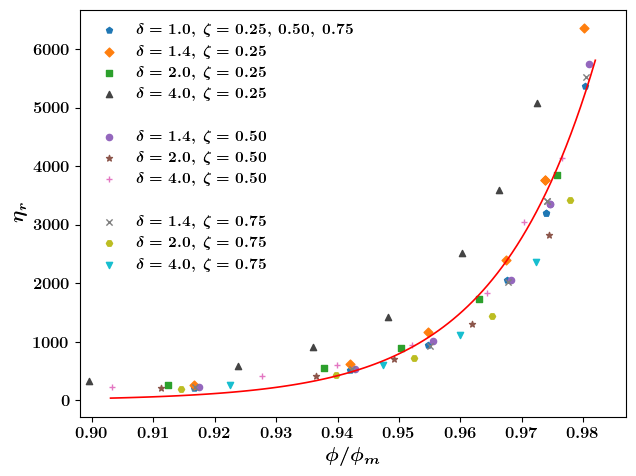

In [36]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals

from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

#phim    = [[0.7854954763461525, 0.7855437529576518, 0.7891401952846274, 0.8226644737782638], 
          #[0.7854954763461525, 0.7848770357288001, 0.7901457354497431, 0.8192596591068829],
          #[0.7854954763461525, 0.7853357301032967, 0.7873975128014937, 0.8021663345214478]]
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [i/phim[0][0] for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [i/phim[l][j+1] for i in phiv]
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xlim(.898,.987)
#plt.ylim(0,7300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=11, frameon=False)
plt.tight_layout()

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]
def power_law(x, a, b):
    return a * x**b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(0.903, 0.982, 100)
plt.plot(xlin, power_law(xlin, *params), color='r', label=f"Fitted power law: y = {a:.2f} * x^{b:.2f}", linewidth=1.2)

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()

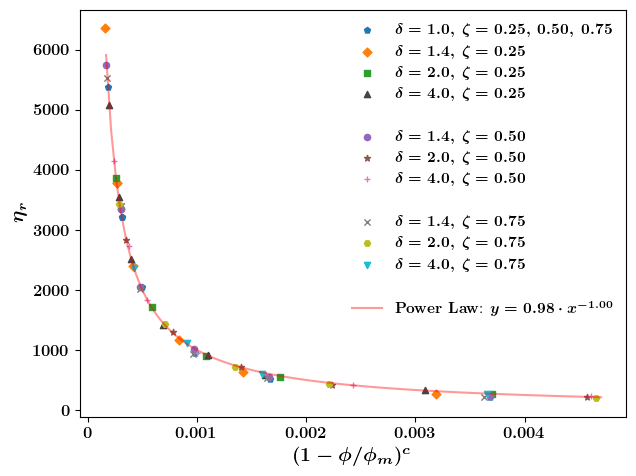

In [128]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** cvals[0][0] if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** cvals[l][j+1] if phim[l][j+1] != 0 and (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$(1-\phi/\phi_m)^c$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(np.arange(0, 0.005, 0.001), labels=["$0$", "$0.001$", "$0.002$", "$0.003$", "$0.004$"], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

def power_law(x, a, b):
     return a * x**b

def linear(x, a, b):
    return a*x + b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(1.7e-4, 47e-4, 100)
plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)

plt.legend(loc='upper right', fontsize=11, frameon=False, labelspacing=.5)
plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()

In [6]:
cvals

[[2.911418608213729,
  2.9958386974200892,
  2.970177835075966,
  3.1598436768477502],
 [2.911418608213729, 2.899791757123296, 2.8589177534829826, 2.858598644996952],
 [2.911418608213729,
  2.9169048431077225,
  2.8061463787679557,
  2.762995720546969]]

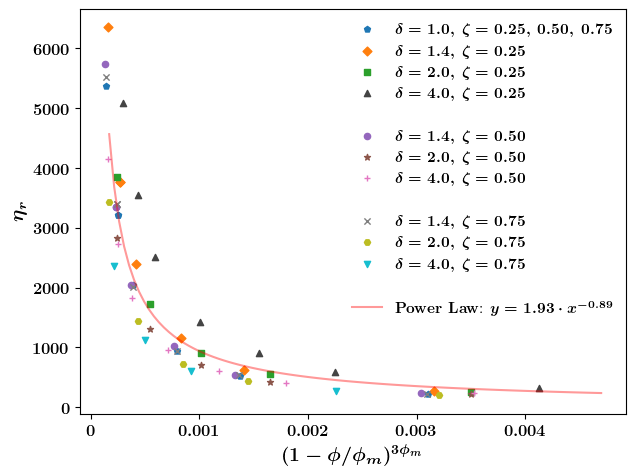

In [9]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** (phim[0][0]*3) if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (3*phim[l][j+1]) if phim[l][j+1] != 0 and (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$(1-\phi/\phi_m)^{3\phi_m}$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(np.arange(0, 0.005, 0.001), labels=["$0$", "$0.001$", "$0.002$", "$0.003$", "$0.004$"], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

def power_law(x, a, b):
     return a * x**b

def linear(x, a, b):
    return a*x + b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(1.7e-4, 47e-4, 100)
plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)

plt.legend(loc='upper right', fontsize=11, frameon=False, labelspacing=.5)
plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()

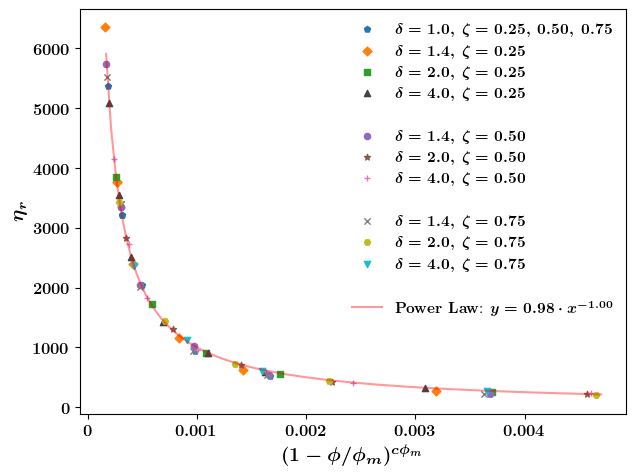

here c ~ 3


In [12]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** (phim[0][0]*cvals[0][0]) if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (cvals[l][j+1]*phim[l][j+1]) if phim[l][j+1] != 0 and (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$(1-\phi/\phi_m)^{c\phi_m}$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(np.arange(0, 0.005, 0.001), labels=["$0$", "$0.001$", "$0.002$", "$0.003$", "$0.004$"], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

def power_law(x, a, b):
     return a * x**b

def linear(x, a, b):
    return a*x + b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(1.7e-4, 47e-4, 100)
plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)

plt.legend(loc='upper right', fontsize=11, frameon=False, labelspacing=.5)
plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()
print('here c ~ 3')

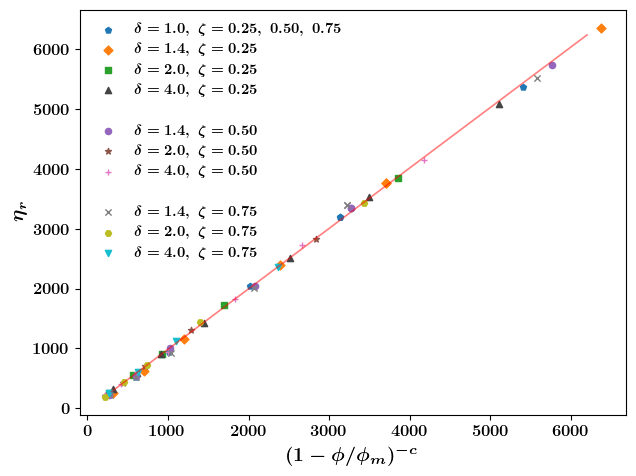

In [139]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals

from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [(1-(i / phim[0][0])) ** -(cvals[0][0]) if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [(1-(i/phim[l][j+1])) ** -(cvals[l][j+1]) if phim[l][j+1] != 0 and (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$(1-\phi/\phi_m)^{-c}$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

#plt.xlim(.898,.987)
#plt.ylim(0,7300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10.5, frameon=False, labelspacing=0.5)
plt.tight_layout()

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

# def power_law(x, a, b):
#     return a * x**b

def linear(x, a, b):
    return a*x + b

params, covariance = curve_fit(linear, phimFlat, viscFlat)
a, b = params
#xlin = np.linspace(0.903, 0.982, 100)
xlin = np.linspace(400, 6200, 100)
plt.plot(xlin, linear(xlin, *params), color='r', label=f"Fitted liner function: y = {a:.2f} * x^{b:.2f}", linewidth=1.2, alpha=0.5)

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()

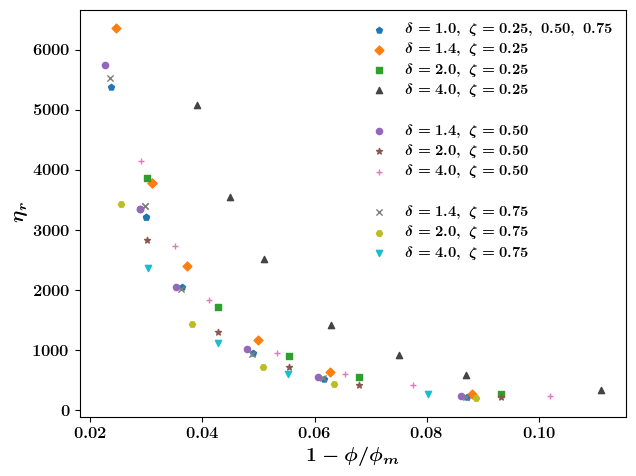

In [80]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals

from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [(1-(i/phim[l][j+1])) if phim[l][j+1] != 0 and (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$1-\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

#plt.xlim(.898,.987)
#plt.ylim(0,7300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10.5, frameon=False, labelspacing=0.5)
plt.tight_layout()

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

# def power_law(x, a, b):
#     return a * x**b

def linear(x, a, b):
    return a*x + b

params, covariance = curve_fit(linear, phimFlat, viscFlat)
a, b = params
#xlin = np.linspace(0.903, 0.982, 100)
xlin = np.linspace(0, 6000, 100)
#plt.plot(xlin, linear(xlin, *params), color='r', label=f"Fitted liner function: y = {a:.2f} * x^{b:.2f}", linewidth=1.2)

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=500)
plt.show()

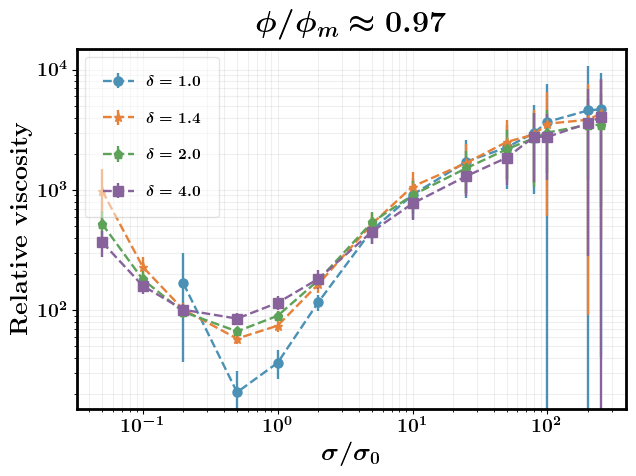

In [38]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.errorbar(stress_plot, visc_plot, yerr=visc_err_plot, linestyle='--', 
         marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color  = colors[j], linewidth=1.7, markersize=6.5)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{Relative viscosity}$', fontsize=18, fontweight='bold', style='italic')
plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
plt.legend(loc='upper left', fontsize=11, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

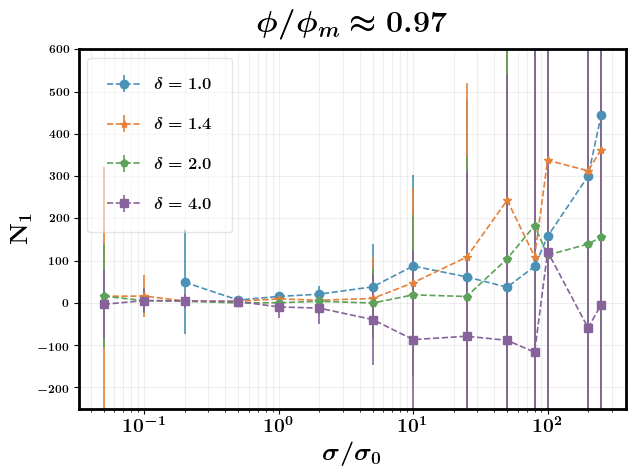

In [40]:
## N1 curve for stress controlled sims (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 10][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.errorbar(stress_plot, visc_plot, yerr=visc_err_plot, linestyle='--', 
         marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color  = colors[j], linewidth=1.2, markersize=6)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{N}_{1}$', fontsize=18, fontweight='bold', style='italic')
plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
plt.legend(loc='upper left', fontsize=12, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.ylim([-250, 600])

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
#plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "n1_flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

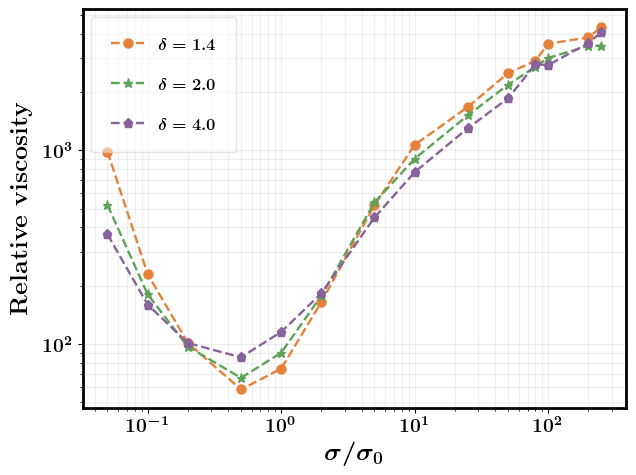

In [42]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'

# below lists should be of the same length
phi = [0.765, 0.77, 0.795]
ar  = [1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress  = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
         marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color=colors[j+1], linewidth=1.7, markersize=6.5)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{Relative viscosity}$', fontsize=18, fontweight='bold', style='italic', labelpad=8)
#plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=24, fontweight='bold',  pad=10)
plt.legend(loc='upper left', fontsize=12, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000], [r'$10^{2}$', r'$10^{3}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".png"
    plt.savefig(fig_save_path+ "flowcurve2"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

## Files check and simulation progress

In [13]:
## simulation progress

npp = 1000
vr  = '0.5'

# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress  = ['0.05', '0.1', '0.2', '0.5', '1', '2', '5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
#topDir = "/Volumes/Rahul_2TB/Miscelleneous/low_stress_othermac/low_stress"
#fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/NCS workshop poster/"

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']


for s in range(len(stress)):
    print('\\')
    for j, arj in enumerate(ar):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    gamma   = data_array[-1,1]
                    if gamma != 12:
                        print(f'stress_{stress[s]}r/phi_{phi[j]}/ar_{arj} - {gamma}')
                else:
                    print(f'stress_{stress[s]}r/phi_{phi[j]}/ar_{arj} - -f error')

\
\
\
\
\
\
\
\
\
\
\
\
\
\


In [76]:
# Check if F_rig exists

phi_vals = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76] #[0.70, 0.72, 0.74, 0.77]
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 1
topDir   = '/Users/rahul/mnt/sshfs_darwin/simulations/'

for i, vr in enumerate(vr_vals):
    for j, ar in enumerate(ar_vals):
        for k, phi in enumerate(phi_vals):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            for run in range(numRuns):
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vr}/run_{run+1}/"
                if os.path.exists(workDir):
                    if not os.path.exists(workDir + 'F_rig.txt'):
                        print(f'No F_rig - {workDir}')

No F_rig - /Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.76/ar_1.0/Vr_0.75/run_1/
No F_rig - /Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.75/ar_2.0/Vr_0.75/run_1/


In [68]:
dataFile = glob.glob('/Users/rahul/mnt/sshfs_darwin/simulations/NP_1000/phi_0.73/ar_2.0/Vr_0.75/run_1/F_rig.txt')[0]
data = np.loadtxt(dataFile)

In [5]:
# check if all cases are complete (gamma =20)

npp      = 1000
phi_vals = [0.785]
vr_vals  = ['0.25', '0.5', '0.75']
ar_vals  = [4.0]
numRuns  = 2
off      = 100
tGamma   = 20 #target

#mac
topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'

for i, vr in enumerate(vr_vals):
    print('\\')
    for j, ar in enumerate(ar_vals):
        vrj = '0.25' if ar == 1 else vr
        for k, phi in enumerate(phi_vals):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            cDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}"
            if os.path.exists(cDir + "/run_1/") and not os.path.exists(cDir + "/run_2/"):
                print(f'run 2 does not exist: {cDir}')
            if os.path.exists(cDir + "/run_2/") and not os.path.exists(cDir + "/run_1/"):
                print(f'run 1 does not exist: {cDir}')
                
            if os.path.exists(cDir):
                for run in range(numRuns):
                    workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1}"
                    file_name = glob.glob(f'{workDir}/data_*.dat')[0]
                    with open(f'{file_name}','r') as file:
                        data_array = np.loadtxt(file)  # Load all data into a 2D array
                        gamma  = data_array[-1,1]
                        #print(f'/phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1} : gamma = {gamma}')
                        if gamma != tGamma:
                            print(f'Simulation incomplete: /phi_{phir}/ar_{ar:.1f}/Vr_{vrj}/run_{run+1} :   current gamma = {gamma}')

\
\
\
Simulation incomplete: /phi_0.785/ar_4.0/Vr_0.75/run_2 :   current gamma = 18.06
